## abc뉴스데이터로 word2vec

In [4]:
from nltk.corpus import abc
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
corpus = abc.sents()

In [4]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [5]:
print('코퍼스의 크기 : ', len(corpus))

코퍼스의 크기 :  29059


In [6]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = corpus, size = 100, window=5, min_count=5, workers=4, sg= 0)
# size = 워드 벡터의 특징 값, 임베딩 된 벡터의 차원
# window = context window의 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram

In [7]:
# word2vec은 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model.wv.most_similar을 지원합니다.
model_result = model.wv.most_similar("man")

In [8]:
print(model_result)

[('woman', 0.9333528280258179), ('Bang', 0.9233417510986328), ('asteroid', 0.9207264184951782), ('third', 0.918730616569519), ('skull', 0.9153257608413696), ('rally', 0.9102543592453003), ('dinosaur', 0.9061086177825928), ('bought', 0.9057536721229553), ('infant', 0.9057197570800781), ('dog', 0.9030852317810059)]


In [9]:
from gensim.models import KeyedVectors

# 저장
model.wv.save_word2vec_format('./w2v')

In [10]:
loaded_model = KeyedVectors.load_word2vec_format("./w2v")
print('모델 load완료')

모델 load완료


In [14]:
model_result = loaded_model.wv.most_similar("man")
print(model_result)

[('woman', 0.9333528280258179), ('Bang', 0.9233417510986328), ('asteroid', 0.9207264184951782), ('third', 0.918730616569519), ('skull', 0.9153257608413696), ('rally', 0.9102543592453003), ('dinosaur', 0.9061086177825928), ('bought', 0.9057536721229553), ('infant', 0.9057197570800781), ('dog', 0.9030852317810059)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [15]:
model_result = loaded_model.wv.most_similar("overacting")
print(model_result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [16]:
loaded_model.most_similar('memory')

[('jolt', 0.9706188440322876),
 ('structures', 0.9704827070236206),
 ('springs', 0.969781756401062),
 ('polymer', 0.9693382978439331),
 ('infection', 0.969312310218811),
 ('charged', 0.9688493609428406),
 ('broad', 0.9688172936439514),
 ('chasing', 0.9685616493225098),
 ('video', 0.968387246131897),
 ('lifting', 0.9678078293800354)]

In [17]:
loaded_model.most_similar('memorry')

KeyError: ignored

In [18]:
loaded_model.most_similar('한글')

KeyError: ignored

## 한국어 word2vec 만들기

In [19]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 453 kB 47.1 MB/s 


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [45]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fb369285410>)

In [46]:
train_data = pd.read_table('ratings.txt')

In [47]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [48]:
print(len(train_data))

200000


In [49]:
# Null값의 존재 유무 확인
print(train_data.isnull().values.any())

True


In [50]:
# Null값의 존재하는 행 제거
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [51]:
print(len(train_data))

199992


In [52]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [53]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [54]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [55]:
# 불용어 제거 및 토큰화 적용
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
  temp_x = okt.morphs(sentence, stem=True)  # okt 형태소 분석기 수행
  temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
  tokenized_data.append(temp_x)
'''
  for word in temp_x:
    if not word in stopwords:
      word
'''

리뷰의 최대 길이 :  72
리뷰의 평균 길이 :  10.716703668146726


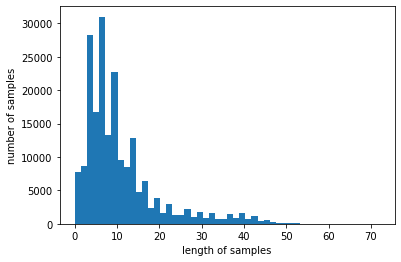

In [56]:
# 리뷰의 길이 분포 확인
print('리뷰의 최대 길이 : ', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 : ', sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [57]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window=5, min_count=5, workers=4, sg=0)

In [58]:
model.wv.vectors.shape

(16477, 100)

In [59]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8714971542358398), ('안성기', 0.8577823042869568), ('박중훈', 0.8406645655632019), ('오달수', 0.8383723497390747), ('이정재', 0.83787602186203), ('설경구', 0.8361873030662537), ('조재현', 0.833686113357544), ('크리스찬', 0.8326413631439209), ('이주승', 0.8313144445419312), ('단역', 0.8307446241378784)]


In [60]:
print(model.wv.most_similar("히어로"))

[('느와르', 0.8500121831893921), ('무협', 0.8432040810585022), ('블록버스터', 0.8394794464111328), ('호러', 0.8290344476699829), ('슬래셔', 0.8181682825088501), ('무비', 0.8165946006774902), ('멜로', 0.812610387802124), ('물', 0.8015182614326477), ('정통', 0.7919278144836426), ('물의', 0.7861737012863159)]


In [61]:
print(model.wv.most_similar("뽀로로"))

[('어린이날', 0.8715011477470398), ('웃찾사', 0.8515750169754028), ('보다야', 0.8493615388870239), ('생방', 0.8431804180145264), ('해운대', 0.8417419195175171), ('태조', 0.8412027955055237), ('태민', 0.8369747996330261), ('유로트립', 0.8359222412109375), ('이휘재', 0.8344013690948486), ('구가의서', 0.833136796951294)]


In [62]:
print(model.wv.most_similar("영화"))

[('독립영화', 0.618923544883728), ('애니메이션', 0.6017606854438782), ('공포영화', 0.601332426071167), ('애니', 0.5984705686569214), ('액션영화', 0.5427537560462952), ('다큐', 0.5379694700241089), ('수작', 0.5323786735534668), ('다큐멘터리', 0.5284956693649292), ('작품', 0.5242071747779846), ('이영화', 0.5073375701904297)]


In [63]:
print(model.wv.most_similar("백혜림"))

KeyError: ignored

## 사전에 훈련된 워드 임베딩 (한국어)

In [64]:
import gensim
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/ClassRoom/영우8기자연어/백혜림강사/dataset/ko.bin')

In [65]:
print(model)

Word2Vec(vocab=30185, size=200, alpha=0.025)


In [67]:
result = model.wv.most_similar("강아지", topn=50)
result

[('고양이', 0.7290452718734741),
 ('거위', 0.7185635566711426),
 ('토끼', 0.7056223154067993),
 ('멧돼지', 0.6950401067733765),
 ('엄마', 0.6934334635734558),
 ('난쟁이', 0.6806551218032837),
 ('한마리', 0.6770296096801758),
 ('아가씨', 0.6750352382659912),
 ('아빠', 0.6729634404182434),
 ('목걸이', 0.6512460708618164),
 ('까마귀', 0.6500682830810547),
 ('아주머니', 0.6432187557220459),
 ('독사', 0.6389124393463135),
 ('고슴도치', 0.6313384771347046),
 ('거북이', 0.6252505779266357),
 ('돼지', 0.6222692131996155),
 ('앵무새', 0.6218831539154053),
 ('개구리', 0.6218565702438354),
 ('당나귀', 0.6206705570220947),
 ('송아지', 0.6165446043014526),
 ('구미호', 0.615827202796936),
 ('메두사', 0.6134721040725708),
 ('사냥개', 0.6131488084793091),
 ('악어', 0.6128274202346802),
 ('뱀파이어', 0.6126487255096436),
 ('맹수', 0.609540581703186),
 ('갈기', 0.6087672114372253),
 ('아저씨', 0.6054108142852783),
 ('바구니', 0.6049458980560303),
 ('샴푸', 0.6020784974098206),
 ('잠자리', 0.6012549996376038),
 ('요괴', 0.6010540127754211),
 ('기러기', 0.6004207134246826),
 ('아기', 0.6002471446

In [68]:
result = model.wv.most_similar("백혜림", topn=50)
result

KeyError: ignored

## 사전 훈련된 워드 임베딩 (영어)

In [ ]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/ClassRoom/영우8기자연어/백혜림강사/dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [74]:
print(model.vectors.shape) # 300만개의 단어와 각 단어 차원이 300차원

(3000000, 300)


In [75]:
print(model.similarity('this', 'is'))

0.40797037


In [76]:
print(model.similarity('post', 'book'))

0.057204384


In [77]:
print(model['book']) # 300차원

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [ ]:
model.most_similar('memory')

## FastText

n = 3  
<apple>  
<\ap, app, ppl, ple, le\>  
subword로 학습   

In [1]:
from gensim.models import FastText

In [7]:
# 위에서 사용한 nltk corpus를 다시 재사용
model_fastText = FastText(corpus, size=100, window=5, min_count=5, workers=4, sg=1)

In [8]:
from gensim.models import Word2Vec
model_wv = Word2Vec(sentences = corpus, size = 100, window=5, min_count=5, workers=4, sg=0)

In [9]:
model_wv.wv.most_similar("electrofishing") # word2vec

KeyError: ignored

In [10]:
model_fastText.wv.most_similar("electrofishing")

[('electric', 0.8711234331130981),
 ('electrode', 0.8694342970848083),
 ('electrodes', 0.8655948638916016),
 ('electricity', 0.8582104444503784),
 ('aircraft', 0.8581817150115967),
 ('electrons', 0.8488699197769165),
 ('electronics', 0.8431084156036377),
 ('electron', 0.8271521925926208),
 ('electronic', 0.8269863724708557),
 ('electromagnetic', 0.8138883709907532)]

## Glove

In [11]:
!pip install glove_python_binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 3.8 MB/s 


In [12]:
from glove import Corpus, Glove

In [13]:
Corpus = Corpus()

In [14]:
Corpus.fit(corpus, window=5)

In [15]:
glove = Glove(no_components=100, learning_rate=0.05)

In [16]:
glove.fit(Corpus.matrix, epochs=10, no_threads=4, verbose=True)
glove.add_dictionary(Corpus.dictionary)

Performing 10 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [17]:
print(glove.most_similar("man"))

[('dog', 0.97265126921082), ('child', 0.9672749513920355), ('person', 0.9400925865412866), ('patient', 0.9362964540668592)]


In [18]:
print(glove.most_similar("boy"))

[('harmless', 0.9870509832295455), ('negotiation', 0.9866817783144058), ('cocker', 0.9865598784000398), ('vertebrate', 0.986378857380538)]


In [19]:
print(glove.most_similar("university"))

[('moon', 0.9749721531686603), ('state', 0.9668141550541715), ('nation', 0.96457022998999), ('biggest', 0.9544880354729565)]
